In [1]:
import pandas as pd
import numpy as np
import math
import statistics
import matplotlib.pyplot as plt
import missingno as msno
import random
import time

In [2]:
#import file excel yang berisi data yang sudah didrop missing value
df = pd.read_csv("kendaraan_train C.csv") 
df.shape

(171068, 11)

<AxesSubplot:>

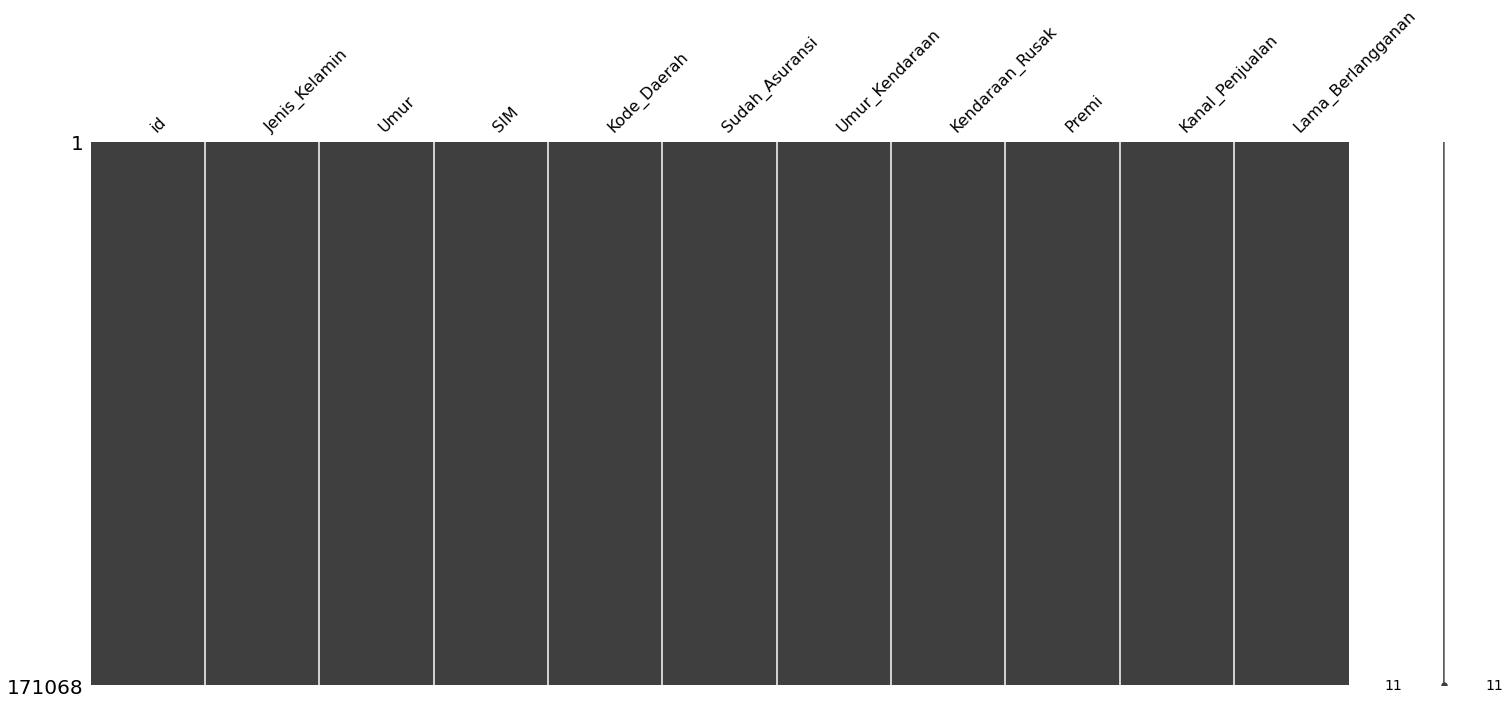

In [3]:
msno.matrix(df)

In [4]:
df.head()

id Jenis_Kelamin  Umur  SIM  Kode_Daerah  Sudah_Asuransi Umur_Kendaraan  \
0   1        Wanita    30    1           33               1      < 1 Tahun   
1   2          Pria    48    1           39               0      > 2 Tahun   
2   4        Wanita    58    1           48               0      1-2 Tahun   
3   6          Pria    21    1           35               1      < 1 Tahun   
4   9        Wanita    20    1            8               1      < 1 Tahun   

  Kendaraan_Rusak  Premi  Kanal_Penjualan  Lama_Berlangganan  
0           Tidak  28029              152                 97  
1          Pernah  25800               29                158  
2           Tidak   2630              124                 63  
3           Tidak  22735              152                171  
4           Tidak  30786              160                 31

In [5]:
df.dtypes

id                    int64
Jenis_Kelamin        object
Umur                  int64
SIM                   int64
Kode_Daerah           int64
Sudah_Asuransi        int64
Umur_Kendaraan       object
Kendaraan_Rusak      object
Premi                 int64
Kanal_Penjualan       int64
Lama_Berlangganan     int64
dtype: object

<AxesSubplot:>

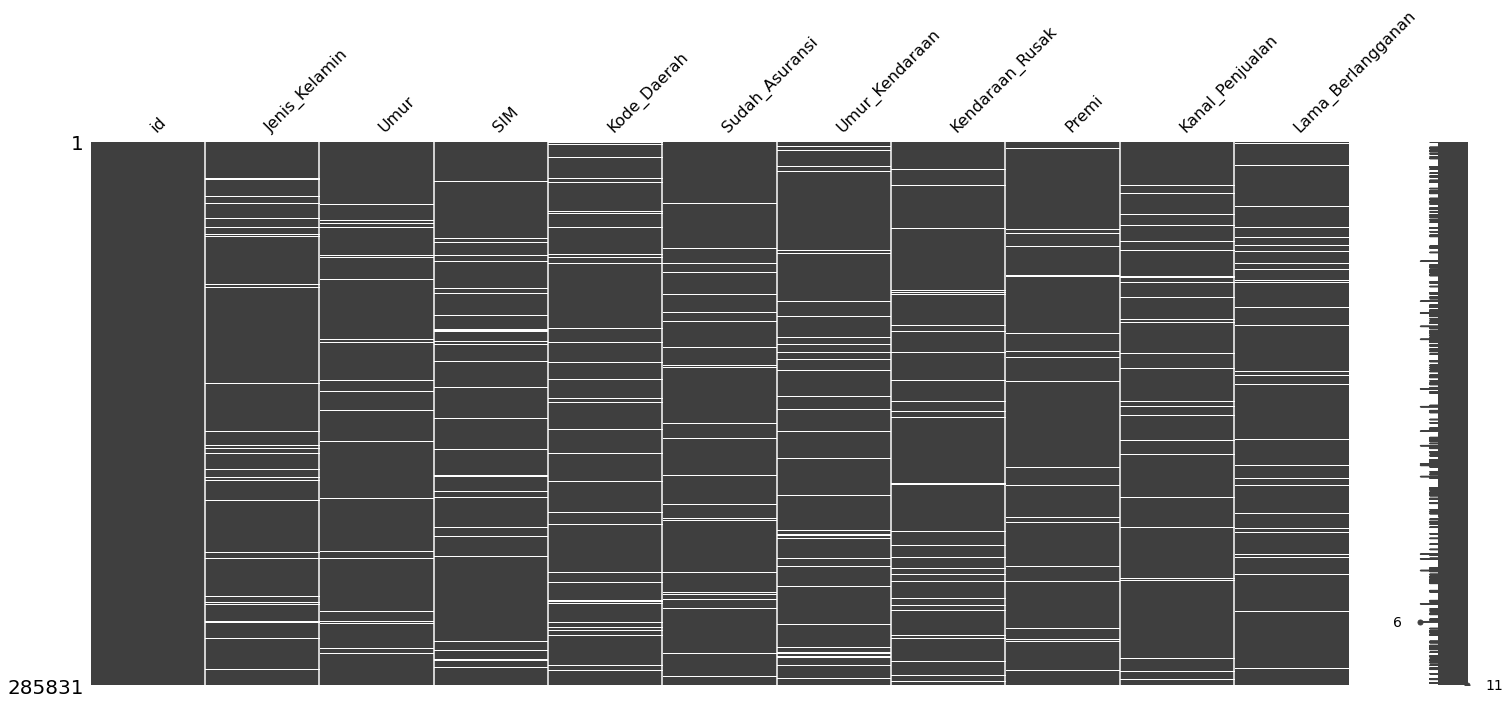

In [6]:
#import file excel yang berisi data yang belum didrop missing value
data = pd.read_csv("1.csv")
msno.matrix(data)

In [7]:
#Mau menghitung berapa persen data yang memiliki nilai yang hilang
deleted = 171068 #Jumlah data yang valid
undeleted = 285831 #Total row dataset
print("Data yang memiliki Missing Values: ", round(((undeleted-deleted)/undeleted) * 100, 0), "%")

Data yang memiliki Missing Values:  40.0 %


Impute Missing Values

In [8]:
#Jumlah Missing Value
print(data.isnull().sum())
data.shape

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
dtype: int64


(285831, 11)

In [9]:
data.head()

id Jenis_Kelamin  Umur  SIM  Kode_Daerah  Sudah_Asuransi Umur_Kendaraan  \
0   1        Wanita  30.0  1.0         33.0             1.0      < 1 Tahun   
1   2          Pria  48.0  1.0         39.0             0.0      > 2 Tahun   
2   3           NaN  21.0  1.0         46.0             1.0      < 1 Tahun   
3   4        Wanita  58.0  1.0         48.0             0.0      1-2 Tahun   
4   5          Pria  50.0  1.0         35.0             0.0      > 2 Tahun   

  Kendaraan_Rusak    Premi  Kanal_Penjualan  Lama_Berlangganan  
0           Tidak  28029.0            152.0               97.0  
1          Pernah  25800.0             29.0              158.0  
2           Tidak  32733.0            160.0              119.0  
3           Tidak   2630.0            124.0               63.0  
4             NaN  34857.0             88.0              194.0

In [10]:
#untuk melihat tipe data tiap kolom
data.dtypes

id                     int64
Jenis_Kelamin         object
Umur                 float64
SIM                  float64
Kode_Daerah          float64
Sudah_Asuransi       float64
Umur_Kendaraan        object
Kendaraan_Rusak       object
Premi                float64
Kanal_Penjualan      float64
Lama_Berlangganan    float64
dtype: object

In [11]:
data.tail

<bound method NDFrame.tail of             id Jenis_Kelamin  Umur  SIM  Kode_Daerah  Sudah_Asuransi  \
0            1        Wanita  30.0  1.0         33.0             1.0   
1            2          Pria  48.0  1.0         39.0             0.0   
2            3           NaN  21.0  1.0         46.0             1.0   
3            4        Wanita  58.0  1.0         48.0             0.0   
4            5          Pria  50.0  1.0         35.0             0.0   
...        ...           ...   ...  ...          ...             ...   
285826  285827        Wanita  23.0  1.0          4.0             1.0   
285827  285828        Wanita  21.0  1.0         46.0             1.0   
285828  285829        Wanita  23.0  1.0         50.0             1.0   
285829  285830          Pria  68.0  1.0          7.0             1.0   
285830  285831          Pria  45.0  1.0         28.0             0.0   

       Umur_Kendaraan Kendaraan_Rusak    Premi  Kanal_Penjualan  \
0           < 1 Tahun           Tidak 

In [12]:
# a = data["Kode_Daerah"]
# unique, counts = np.unique(a, return_counts=True)
# dict(zip(unique, counts))

In [17]:
# a = data["Sudah_Asuransi"]
# unique, counts = np.unique(a, return_counts=True)
# dict(zip(unique, counts))

In [8]:
#input missing value
data["Jenis_Kelamin"] = data["Jenis_Kelamin"].replace(np.NaN, np.random.choice(a=["Pria", "Wanita"],p=[0.54, 0.46]))
data["Umur"] = data["Umur"].replace(np.NaN, data["Umur"].mean())
data["SIM"] = data["SIM"].replace(np.NaN, np.random.choice(a=[1, 0],p=[0.9956, 0.0044]))
data["Kode_Daerah"] = data["Kode_Daerah"].replace(np.NaN, statistics.mode(data["Kode_Daerah"]))
data["Sudah_Asuransi"] = data["Sudah_Asuransi"].replace(np.NaN, np.random.choice(a=[0, 1],p=[0.5417, 0.4583]))
data["Umur_Kendaraan"] = data["Umur_Kendaraan"].replace(np.NaN, np.random.choice(a=["< 1 Tahun", "1-2 Tahun", "> 2 Tahun"],p=[0.431, 0.527, 0.042]))
data["Kendaraan_Rusak"] = data["Kendaraan_Rusak"].replace(np.NaN, np.random.choice(a=["Pernah", "Tidak"],p=[0.5355, 0.4645]))
data["Premi"] = data["Premi"].replace(np.NaN, data["Premi"].mean())
data["Kanal_Penjualan"] = data["Kanal_Penjualan"].replace(np.NaN, 152)
data["Lama_Berlangganan"] = data["Lama_Berlangganan"].replace(np.NaN, data["Lama_Berlangganan"].mean())
# print(data["Kendaraan_Rusak"][:50])

In [9]:
#konversi tipe data
convert_data_types ={
    'id' : int,
    'Jenis_Kelamin' : object,
    'Umur' : int,
    'SIM' : int,
    'Kode_Daerah' : int,
    'Sudah_Asuransi' : int,
    'Umur_Kendaraan' : object,
    'Kendaraan_Rusak' : object,
    'Premi' : int,
    'Kanal_Penjualan' : int,
    'Lama_Berlangganan' : int
}
data = data.astype(convert_data_types)
data.dtypes

id                    int32
Jenis_Kelamin        object
Umur                  int32
SIM                   int32
Kode_Daerah           int32
Sudah_Asuransi        int32
Umur_Kendaraan       object
Kendaraan_Rusak      object
Premi                 int32
Kanal_Penjualan       int32
Lama_Berlangganan     int32
dtype: object

Outliers

<AxesSubplot:>

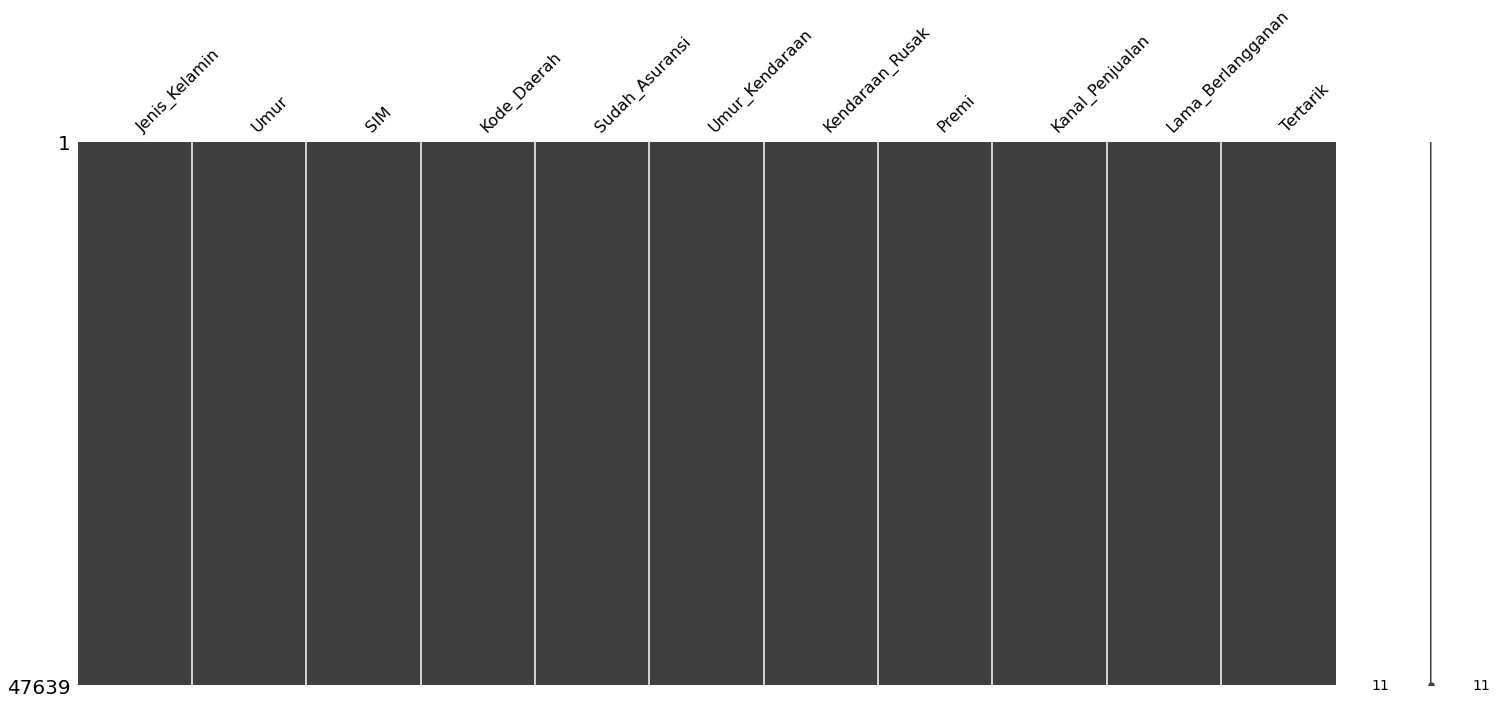

In [16]:
#import dataset test
data_test = pd.read_csv("kendaraan_test.csv")
msno.matrix(data_test)

In [10]:
import seaborn as sns

<AxesSubplot:xlabel='Premi'>

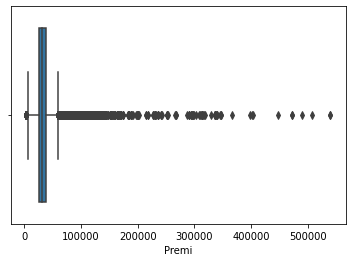

In [11]:
#Plot Outlier kolom Premi
sns.boxplot(x=data['Premi'])

In [18]:
#Plot kolom Kode_Daerah dan Premi

# fig, ax = plt.subplots(figsize=(16,8))
# ax.scatter(data['Kode_Daerah'], data['Premi'])
# ax.set_xlabel('Kode Daerah')
# ax.set_ylabel('Premi')
# plt.show()

In [13]:
data.columns

Index(['id', 'Jenis_Kelamin', 'Umur', 'SIM', 'Kode_Daerah', 'Sudah_Asuransi',
       'Umur_Kendaraan', 'Kendaraan_Rusak', 'Premi', 'Kanal_Penjualan',
       'Lama_Berlangganan'],
      dtype='object')

In [17]:
#Mendeteksi Outlier pada kolom Premi
def detect_outlier(data_1):
    outliers=[]
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    count = 0
    lowest = 500000
    highest = 0

    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            count += 1
            outliers.append(y)
            if lowest > y:
                lowest = y
            if highest < y:
                highest = y
    return outliers, count, lowest, highest

outlier_datapoints1, countTr, low, high = detect_outlier(data["Premi"])
print(f"Data Train (Lowest: {low} ; Highest {high}):", countTr, "->", round((countTr/len(data))*100, 0), "%")

outlier_datapoints2, countTe, low, high = detect_outlier(data_test["Premi"])
print(f"Data Test (Lowest: {low}; Highest: {high}):", countTe, "->", round((countTe/len(data_test))*100, 0), "%")


Data Train (Lowest: 80682 ; Highest 540165): 1626 -> 1.0 %
Data Test (Lowest: 82876; Highest: 540165): 253 -> 1.0 %


Data Distributions

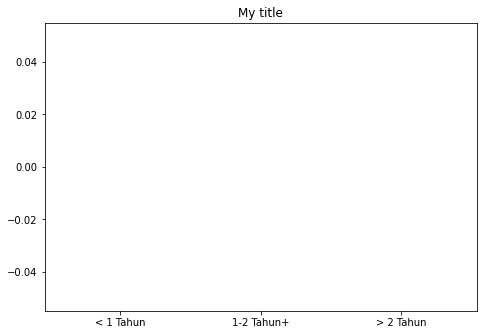

In [52]:
#Melihat persebaran data untuk tiap kategori di kolom Umur_Kendaraan
less = 0
mid = 0
over = 0

for i in data["Umur_Kendaraan"] :
    if i == "< 1 Tahun":
        less += 1
    elif i == "1-2 Tahun":
        mid += 1
    elif i == "> 2 Tahun":
        over += 1

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
umurK = ['< 1 Tahun', '1-2 Tahun+', '> 2 Tahun']
valueUmurK = [less,mid,over]
ax.bar(umurK,valueUmurK)
plt.title('Umur Kendaraan')
plt.show()

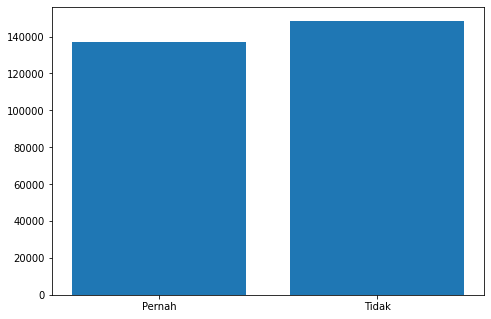

In [20]:
#Melihat persebaran data untuk tiap kategori di kolom Kendaraan_Rusak
rusak = 0
tidakRusak = 0

for i in data["Kendaraan_Rusak"] :
    if i == "Pernah":
        rusak += 1
    elif i == "Tidak":
        tidakRusak += 1

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
umurK = ['Pernah', 'Tidak']
valueUmurK = [rusak,tidakRusak]
ax.bar(umurK,valueUmurK)
plt.title('Kendaraan Rusak')
plt.show()

Scaling

In [21]:
#Scaling kolom Umur_Kendaraan untuk diubah nilainya menjadi range 0 - 1
scale_Umur_Kendaraan = {"< 1 Tahun":0, "1-2 Tahun":0.5, "> 2 Tahun":1}
    
data["Umur_Kendaraan"] = data["Umur_Kendaraan"].replace(scale_Umur_Kendaraan)

print(data["Umur_Kendaraan"][:5])

0    0.0
1    1.0
2    0.0
3    0.5
4    1.0
Name: Umur_Kendaraan, dtype: float64


In [22]:
#Scaling kolom Kendaraan_Rusak untuk diubah nilainya menjadi range 0 - 1
scale_Kendaraan_Rusak = {"Tidak":0, "Pernah":1}
    
data["Kendaraan_Rusak"] = data["Kendaraan_Rusak"].replace(scale_Kendaraan_Rusak)

print(data["Kendaraan_Rusak"][:5])

0    0
1    1
2    0
3    0
4    0
Name: Kendaraan_Rusak, dtype: int64


Normalization

In [24]:
#Normalisasi kolom Premi sehingga nilainya berada di range 0 - 1 
def min_max_normalization (value, data2):
    return (value - data2.min()) / (data2.max() - data2.min())

tic = time.perf_counter()

for i in range(len(data["Premi"])):
    scale_Premi = min_max_normalization (data["Premi"].iloc[i], data["Premi"])
    data["Premi"].iloc[i] = scale_Premi

toc = time.perf_counter()    
print(f"Time: {toc - tic:0.4f} seconds")
print(data["Premi"][:5])

C:\Users\shidq\AppData\Roaming\Python\Python39\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
Time: 486.8930 seconds
0    0.047251
1    0.047763
2    0.060598
3    0.004869
4    0.064530
Name: Premi, dtype: float64


Dimensionality Reductions

In [27]:
#Yang diambil 3 kolom lalu diubah menadi list
#[Umur_kendaraan, Kendaraan_Rusak, Premi]
dataList = data[["Umur_Kendaraan", "Kendaraan_Rusak", "Premi"]].values.tolist()
len(dataList)
dataList[:10]

[[0.0, 0.0, 0.047250876687099444],
 [1.0, 1.0, 0.047763100174894095],
 [0.0, 0.0, 0.06059806839101972],
 [0.5, 0.0, 0.0048687956072277425],
 [1.0, 0.0, 0.06453027398181872],
 [0.0, 0.0, 0.04208898269256069],
 [0.5, 1.0, 0.06004645881084174],
 [0.0, 0.0, 0.04974219983410439],
 [0.0, 0.0, 0.056993687870733965],
 [1.0, 1.0, 0.16454786210205088]]

K Means

In [39]:
def init_centroid(k, M):
    arr = []
    for i in range (k):
        r = random.randint(0,len(M)) #pilih angka random dari 0 sampai panjang datapoint
        arr.append(M[r]) #hasil dari angka yang dipilih menunjukan baris datapoint mana yang dijadikan centroid
    return np.asarray(arr)

In [40]:
def dist (a,b):
    return np.sqrt(sum(np.square(a-b))) #Euclidean Distance

In [41]:
def cluster_determination(k, X, cg):
    cluster = [-1]*len(X) #array cluster sepanjang datapoint
    for i in range(len(X)): #Loop semua datapoint
        dist_arr = [] #array untuk menyimpan jarak datapoint di tiap centroid
        for j in range(k): #Loop semua centroid
            dist_arr.append(dist(X[i], cg[j])) #kalkulasi jarak antar datapoint dan centroid
        idx = np.argmin(dist_arr) #ambil index yang dimana memiliki value terkecil
        cluster[i] = idx #indeks tersebut berarti yang menjadi cluster di datapoint tersebut
    return np.asarray(cluster) #output cluster

In [42]:
def compute_centroid(k, X, cluster):
    cg_arr = []
    for i in range(k):#Loop semua centroid
        arr = []
        for j in range(len(X)): #Loop semua datapoint
            if cluster[j] == i:
                arr.append(X[j])
        cg_arr.append(np.mean(arr, axis=0)) #rata rata nilai pada cluster tersebut
    return np.asarray(cg_arr)

In [43]:
def  measure_change(cg_prev, cg_new):
    res = 0
    for a,b in zip(cg_prev, cg_new): #zip untuk menggabungkan 2 list menjadi 1. Looping tiap kolom di cg_prev dan cg_new. a mewakili cg_prev. b mewakili cg_new.
        res += dist(a,b) #perhitungan jarak antar cg_prev dan cg_new
    return res #output jarak

In [51]:
def KMeans (k, X):
    cg_prev = init_centroid(k, X) #inisiasi centroid
    cluster = [0]*len(X) #deklarasi cluster
    cg_change = 100
    while cg_change > .001: #Looping sampai perubahan centroid dibawah 0.001
        cluster = cluster_determination(k, X, cg_prev) #Penentuan cluster untuk tiap datapoint
        cg_new = compute_centroid(k, X, cluster) #Untuk merelokasi posisi centroid berdasarkan nilai rata ratanya
        cg_change = measure_change(cg_prev, cg_new) #kalkulasi perubahan centroid yang dulu dengan yang baru
        cg_prev = cg_new #update centroid yang dulu
    return cluster

for i in range(5):
    tic = time.perf_counter()
    cluster = KMeans(2, dataList)
    print(cluster)
    toc = time.perf_counter()
    print(f" {i + 1} iteration {toc - tic:0.4f} seconds")



[1 0 1 ... 1 1 0]
 1 iteration 9.0108 seconds
[0 1 0 ... 0 0 1]
 2 iteration 9.2308 seconds
[1 0 1 ... 1 1 0]
 3 iteration 9.0654 seconds
[1 0 1 ... 1 1 0]
 4 iteration 18.4826 seconds
[1 0 1 ... 1 1 0]
 5 iteration 18.1538 seconds


Export Result

In [49]:
#Input kolom cluster yang berisi hasil clustering
result = cluster
data["Cluster"] = result
dataw

id Jenis_Kelamin  Umur  SIM  Kode_Daerah  Sudah_Asuransi  \
0            1        Wanita    30    1           33               1   
1            2          Pria    48    1           39               0   
2            3        Wanita    21    1           46               1   
3            4        Wanita    58    1           48               0   
4            5          Pria    50    1           35               0   
...        ...           ...   ...  ...          ...             ...   
285826  285827        Wanita    23    1            4               1   
285827  285828        Wanita    21    1           46               1   
285828  285829        Wanita    23    1           50               1   
285829  285830          Pria    68    1            7               1   
285830  285831          Pria    45    1           28               0   

        Umur_Kendaraan  Kendaraan_Rusak     Premi  Kanal_Penjualan  \
0                  0.0                0  0.047251              152   
1                  1.0                1  0.047763               29   
2                  0.0                0  0.060598              160   
3                  0.5                0  0.004869              124   
4                  1.0                0  0.064530               88   
...                ...              ...       ...              ...   
285826             0.0                0  0.522361              152   
285827             0.0                0  0.898193              152   
285828             0.0                0  1.000000              152   
285829             0.5                0  0.836157              124   
285830             0.5                1  1.000000               26   

        Lama_Berlangganan  Cluster  
0                      97        1  
1                     158        0  
2                     119        1  
3                      63        1  
4                     194        1  
...                   ...      ...  
285826                217        1  
285827                 50        1  
285828                226        1  
285829                270        1  
285830                 44        0  

[285831 rows x 12 columns]

In [32]:
#export menjadi file excel
import openpyxl
data.to_excel('Hasil Clustering.xlsx')